In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Acquisition
##### Flat Acquisition using csv files

In [14]:
movies = pd.read_csv('./data/movies.csv')
# genome_scores = pd.read_csv('./data/genome-scores.csv')
# genome_tags = pd.read_csv('./data/genome-tags.csv')
ratings = pd.read_csv('./data/ratings.csv')
tags = pd.read_csv('./data/tags.csv')

In [15]:
# print the first 5 rows of the movies, ratings, and tags dataframes
print(movies.head())
print(ratings.head())
print(tags.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
   userId  movieId  rating   timestamp
0       1      296     5.0  1147880044
1       1      306     3.5  1147868817
2       1      307     5.0  1147868828
3       1      665     5.0  1147878820
4       1      899     3.5  1147868510
   userId  movieId               tag   timestamp
0       3      260           classic  1439472355
1       3      260            sci-fi  1439472256
2       4     1732      

In [16]:
grouped_ratings = ratings.groupby('movieId').agg({'rating': ['mean', 'count'], 'timestamp': ['mean']})
grouped_ratings.columns = ['mean_rating', 'rating_count', 'mean_timestamp']
grouped_ratings = grouped_ratings.astype({'mean_timestamp': 'int'})

# Merge dei dataset movies e ratings
# rimuove i film che non hanno rating
movies_ratings = pd.merge(movies, grouped_ratings, on='movieId')
movies_ratings.head()

,movieId,title,genres,mean_rating,rating_count,mean_timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893708,57309,1153152210
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.251527,24228,1122310117
2,3,Grumpier Old Men (1995),Comedy|Romance,3.142028,11804,980602256
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.853547,2523,942460471
4,5,Father of the Bride Part II (1995),Comedy,3.058434,11714,1004723013


In [17]:
# mantiene i duplicati, per rimuoverli usare .apply[set, list]
# tags.groupby('movieId')['tag'].apply(set)
new_tags = tags.groupby('movieId')['tag'].apply(set).apply(list)

df = pd.merge(movies_ratings, new_tags, on='movieId')
df.head()

,movieId,title,genres,mean_rating,rating_count,mean_timestamp,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893708,57309,1153152210,"[villian hurts toys, itaege, good cartoon chin..."
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.251527,24228,1122310117,"[Robin Williams, bad cgi, itaege, new home, Ch..."
2,3,Grumpier Old Men (1995),Comedy|Romance,3.142028,11804,980602256,"[Burgess Meredith, old people that is actually..."
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.853547,2523,942460471,"[chick flick, divorce, single mother, CLV, cha..."
4,5,Father of the Bride Part II (1995),Comedy,3.058434,11714,1004723013,"[aging, pregnancy, Fantasy, Steve Martin, CLV,..."


In [18]:
# one hot encoding for genres
# print every category in movies dataset
categories = set()
for s in df['genres'].str.split('|').values:
    categories = categories.union(set(s))

# add columns for each category
for category in categories:
    df[category] = df['genres'].str.contains(category).astype(int)

# delete genres column
df = df.drop(columns=['genres'])

df.head()

/var/folders/x8/p0tjyw5163s2pb2vfft_2jbc0000gn/T/ipykernel_7272/2701015487.py:9: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[category] = df['genres'].str.contains(category).astype(int)


,movieId,title,mean_rating,rating_count,mean_timestamp,tag,War,Thriller,Comedy,Western,...,Fantasy,Mystery,Animation,Romance,Children,IMAX,Horror,Drama,Documentary,Musical
0,1,Toy Story (1995),3.893708,57309,1153152210,"[villian hurts toys, itaege, good cartoon chin...",0,0,1,0,...,1,0,1,0,1,0,0,0,0,0
1,2,Jumanji (1995),3.251527,24228,1122310117,"[Robin Williams, bad cgi, itaege, new home, Ch...",0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,3,Grumpier Old Men (1995),3.142028,11804,980602256,"[Burgess Meredith, old people that is actually...",0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),2.853547,2523,942460471,"[chick flick, divorce, single mother, CLV, cha...",0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
4,5,Father of the Bride Part II (1995),3.058434,11714,1004723013,"[aging, pregnancy, Fantasy, Steve Martin, CLV,...",0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## Data Visualization

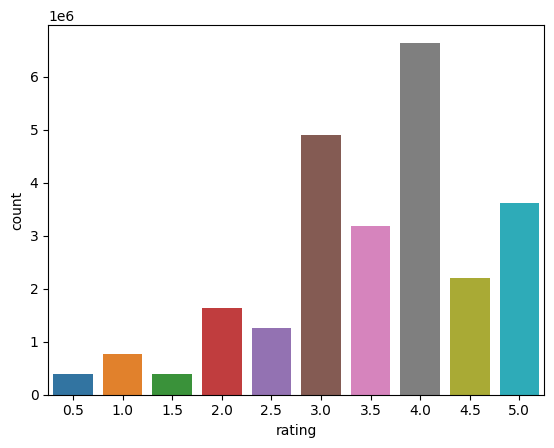

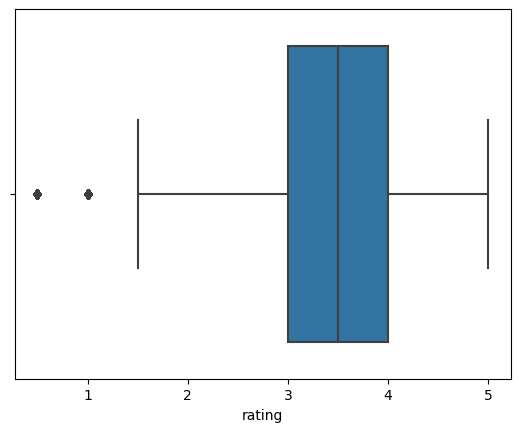

In [52]:
# Per capire la distribuzione dei rating
sns.countplot(x='rating', data=ratings)
plt.show()

sns.boxplot(x='rating', data=ratings)
plt.show()

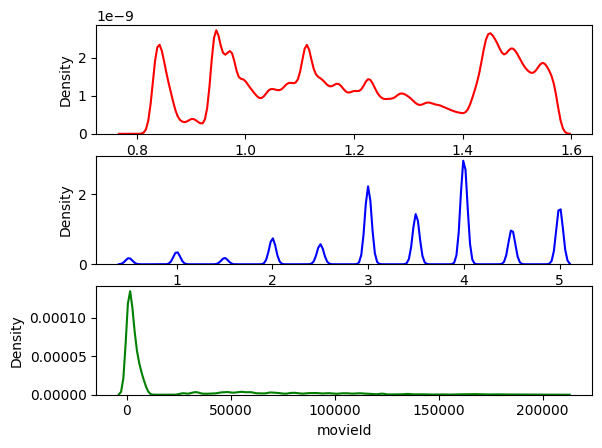

In [53]:
# Observing the distribution of all attributes for every file
# This is useful to show data trends, to reveal outliers and leverage points, to provide hints about modeling techniques to apply.

# print distribution for ratings
fig, axs = plt.subplots(3)
sns.kdeplot(ratings['timestamp'], ax=axs[0], color='r', label='timestamp')
sns.kdeplot(ratings['rating'], ax=axs[1], color='b', label='rating')
sns.kdeplot(ratings['movieId'], ax=axs[2], color='g', label='movieId')

axs[0].set_xlabel('timestamp')
axs[1].set_xlabel('rating')
axs[2].set_xlabel('movieId')
plt.show()

In [54]:
# Scatter plot matrix
# Completamente inutile
# sns.pairplot(ratings)
# plt.show()

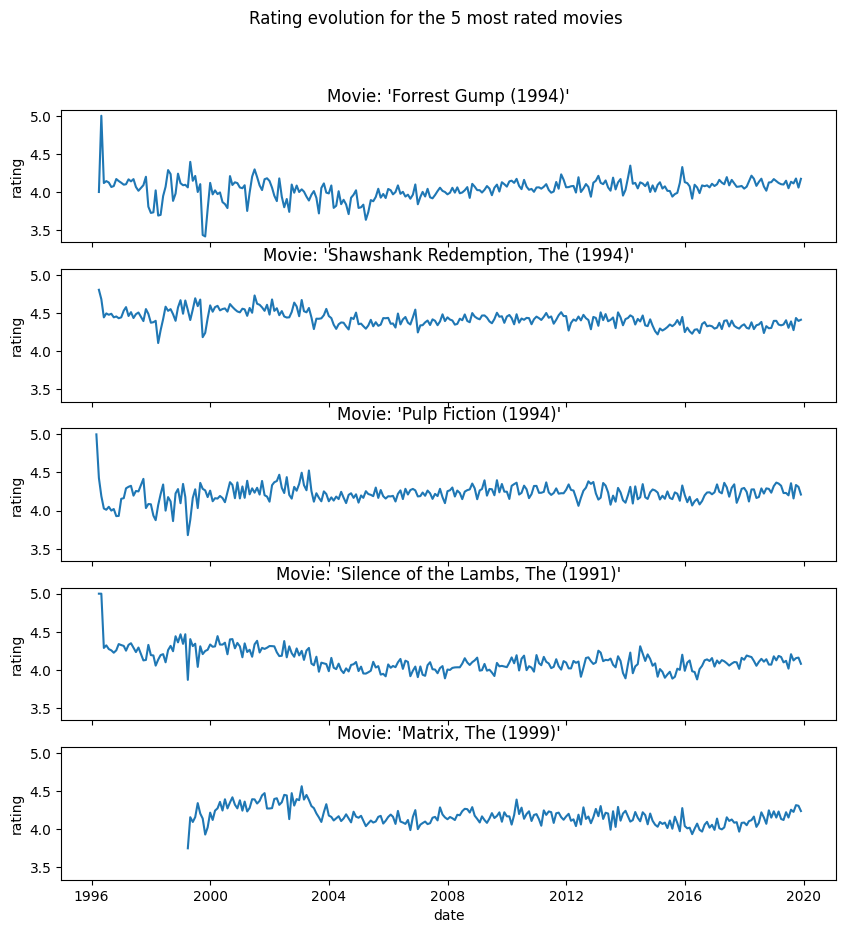

In [55]:
movies_to_show = 5
fig, axs = plt.subplots(movies_to_show, sharex=True, sharey=True, figsize=(10, 10))

most_rated_movies = ratings.groupby('movieId').count().sort_values('rating', ascending=False).head(movies_to_show).index

to_line_plot = []
for i in range(movies_to_show):
    tmp = ratings.where(ratings['movieId'] == most_rated_movies[i]).dropna()
    tmp['date'] = pd.to_datetime(tmp['timestamp'], unit='s')
    
    # Computing the mean for each month
    tmp = tmp.resample("M", on='date').mean()[['movieId', 'rating']].dropna()
    to_line_plot.append(tmp)
    movie_title = movies.where(movies['movieId'] == most_rated_movies[i]).dropna()['title'].values[0]
    axs[i].set_title("Movie: '" + movie_title + "'")
    

for i in range(movies_to_show):
    sns.lineplot(x='date', y='rating', ax=axs[i], data=to_line_plot[i])

fig.suptitle('Rating evolution for the 5 most rated movies')
plt.show()

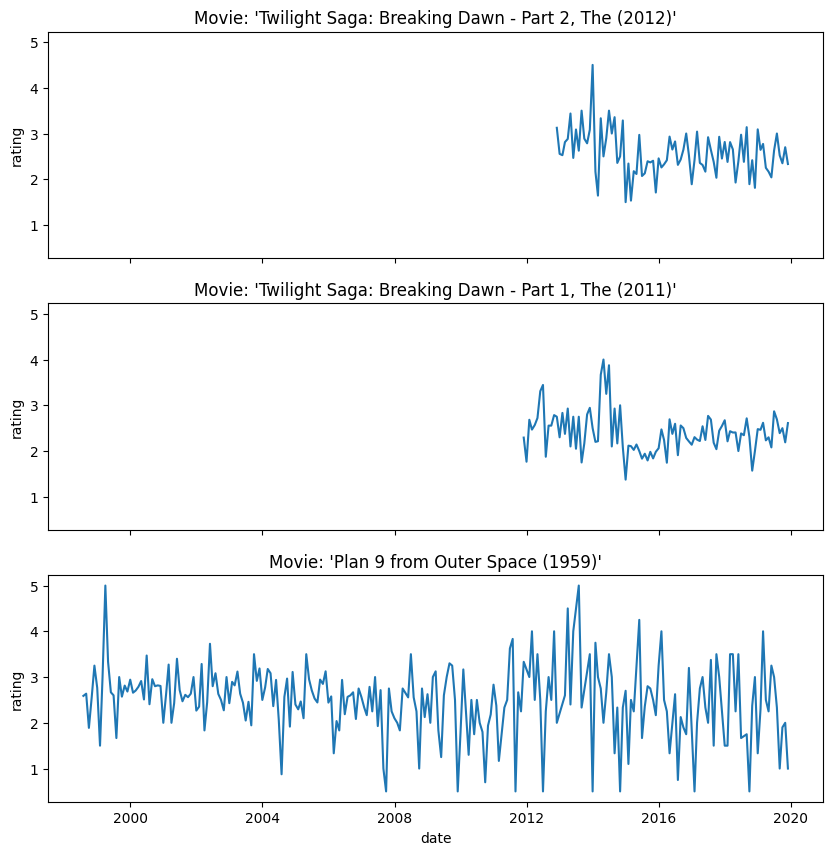

In [56]:
# Same as above cell but the 3 movies with the highest standard deviation
movies_to_show = 3
fig, axs = plt.subplots(movies_to_show, sharex=True, sharey=True, figsize=(10, 10))

# Take movies with at least 1000 ratings
high_std_movies = ratings.where(
    ratings['movieId']
    .isin(ratings.groupby('movieId')
          .count()
          .where(ratings.groupby('movieId').count()['rating'] > 1000)
          .dropna().index)
    ).dropna()

# most_rated_movies = ratings.groupby('movieId').count().sort_values('rating', ascending=False).head(movies_to_show).index
high_std_movies = high_std_movies.groupby('movieId').std().sort_values('rating', ascending=False).head(movies_to_show).index

to_line_plot = []
for i in range(movies_to_show):
    tmp = ratings.where(ratings['movieId'] == high_std_movies[i]).dropna()
    tmp['date'] = pd.to_datetime(tmp['timestamp'], unit='s')
    
    # Computing the mean for each month
    tmp = tmp.resample("M", on='date').mean()[['movieId', 'rating']].dropna()
    to_line_plot.append(tmp)
    movie_title = movies.where(movies['movieId'] == high_std_movies[i]).dropna()['title'].values[0]
    axs[i].set_title("Movie: '" + movie_title + "'")

for i in range(movies_to_show):
    sns.lineplot(x='date', y='rating', ax=axs[i], data=to_line_plot[i])

# Print the titles of the movies
plt.show()

## Data Preprocessing

In [19]:

# from title extract year
df['year'] = df['title'].str.extract('(\(\d{4}\))', expand=True)
# remove parentheses
df['year'] = df['year'].str.extract('(\d{4})', expand=True)
#print(df_preprocessed.head())

# df with movies that have no year or year is not numeric \d{4}
year_not_numeric = df.loc[df['year'].isna()]

# remove movies with no year
df = df.dropna(subset=['year'])

# delete title column
df = df.drop(columns=['title'])

df.head()

,movieId,mean_rating,rating_count,mean_timestamp,tag,War,Thriller,Comedy,Western,Film-Noir,...,Mystery,Animation,Romance,Children,IMAX,Horror,Drama,Documentary,Musical,year
0,1,3.893708,57309,1153152210,"[villian hurts toys, itaege, good cartoon chin...",0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1995
1,2,3.251527,24228,1122310117,"[Robin Williams, bad cgi, itaege, new home, Ch...",0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1995
2,3,3.142028,11804,980602256,"[Burgess Meredith, old people that is actually...",0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1995
3,4,2.853547,2523,942460471,"[chick flick, divorce, single mother, CLV, cha...",0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1995
4,5,3.058434,11714,1004723013,"[aging, pregnancy, Fantasy, Steve Martin, CLV,...",0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1995


In [50]:
df_preprocessed = df.copy()

# transform mean_timestamp in year
df_preprocessed['year_timestamp'] = pd.to_datetime(df_preprocessed['mean_timestamp'], unit='s').dt.year

# from column to series
df_preprocessed['year'] = df_preprocessed['year'].astype(int)
df_preprocessed['year_timestamp'] = df_preprocessed['year_timestamp'].astype(int)

# compute correlation and covariance between year_timestamp and year
# print(df_preprocessed['year_timestamp'].corr(df_preprocessed['year']))
# print(df_preprocessed['year_timestamp'].cov(df_preprocessed['year']))

print(df_preprocessed.corr())
print(df_preprocessed.cov())

print(df_preprocessed.describe())


/var/folders/x8/p0tjyw5163s2pb2vfft_2jbc0000gn/T/ipykernel_7272/1107330682.py:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df_preprocessed.corr())
/var/folders/x8/p0tjyw5163s2pb2vfft_2jbc0000gn/T/ipykernel_7272/1107330682.py:15: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df_preprocessed.cov())


                     movieId  mean_rating  rating_count  mean_timestamp  \
movieId             1.000000    -0.101011     -0.260941        0.877751   
mean_rating        -0.101011     1.000000      0.132640       -0.063164   
rating_count       -0.260941     0.132640      1.000000       -0.270657   
mean_timestamp      0.877751    -0.063164     -0.270657        1.000000   
War                -0.066631     0.050338      0.018146       -0.044185   
Thriller           -0.027043    -0.073329      0.066996       -0.005089   
Comedy             -0.083300    -0.029512      0.033881       -0.083180   
Western            -0.031060    -0.013533     -0.006786       -0.021006   
Film-Noir          -0.066466     0.030073      0.003847       -0.036048   
Sci-Fi              0.004640    -0.128357      0.086585        0.009161   
(no genres listed)  0.166018    -0.001263     -0.039653        0.126629   
Adventure          -0.061658    -0.028135      0.122405       -0.043006   
Action             -0.024

## Modeling

## Performance Evaluation